# Final Task Virtual Internship Experience ID/X Partners - Data Scientist
## Predicting Credit Risk
### Adhitya Primandhika

# Import Libraries
Before we start, we need to import every libraries that we need

In [1]:
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For data engineering
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.preprocessing import MinMaxScaler

# For machine learning and its evaluation
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE
from pickle import dump, load
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline

# For ignoring some warnings
import warnings
warnings.filterwarnings("ignore")

# Import Dataset
Next, we need to import the dataset of loan data from 2007-2014 as our dataset

In [47]:
# Looking to our dataset
df_loan = pd.read_csv("loan_data_2007_2014.csv", index_col=0)
df_loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


## First Look on Dataset
We need to know more about the dataset

### Find The Information About The Dataset

In [48]:
# Find the information about dataset
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

From seeing the information of our dataset, we there are several column that only contain NaN values. So, we can drop those columns that won"t give us any useful information.

## Data Preprocessing

### Dropping Some Unnecessary Columns

In [49]:
# Dropping some columns with only NaN values
df_loan = df_loan.drop(["annual_inc_joint", "dti_joint", "verification_status_joint", \
                        "open_acc_6m", "open_il_6m", "open_il_12m", "open_il_24m", \
                        "mths_since_rcnt_il", "total_bal_il", "il_util", "open_rv_12m", \
                        "open_rv_24m", "max_bal_bc", "all_util", "inq_fi", "total_cu_tl", \
                        "inq_last_12m"], axis=1)

df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


Next, we can see how many unique values from each column

In [50]:
# Looking for total of unique values from each column
df_loan.nunique()

id                             466285
member_id                      466285
loan_amnt                        1352
funded_amnt                      1354
funded_amnt_inv                  9854
term                                2
int_rate                          506
installment                     55622
grade                               7
sub_grade                          35
emp_title                      205475
emp_length                         11
home_ownership                      6
annual_inc                      31901
verification_status                 3
issue_d                            91
loan_status                         9
pymnt_plan                          2
url                            466285
desc                           124436
purpose                            14
title                           63099
zip_code                          888
addr_state                         50
dti                              3997
delinq_2yrs                        24
earliest_cr_

Beside some columns that we already dropping it, there are still some column that are not useful for our machine learning modelling later such as id, member_id, some columns like desc that the value already represented by purpose column, and also some columns that only have 1 unique value. So we can drop those too.

In [51]:
# Dropping some columns that not so useful and redundant
df_loan = df_loan.drop(["id","member_id","url","zip_code","desc","addr_state","policy_code", \
                        "application_type", "title", "emp_title", "sub_grade"], axis=1)

df_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,...,Jan-15,171.62,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,...,Apr-13,119.66,NaN,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,...,Jun-14,649.91,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,...,Jan-15,357.48,NaN,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,...,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN


We also need to drop some columns that have data from the future. Because we want to create model that can predict is it the good loan or a bad loan based on data before the credit is given.

In [52]:
# Dropping some columns that have data from the future that we don"t know yet
df_loan = df_loan.drop(["out_prncp", "out_prncp_inv", "recoveries", "last_pymnt_d", \
                        "next_pymnt_d", "last_pymnt_amnt", "total_pymnt", "total_pymnt_inv", \
                        "total_rec_prncp", "total_rec_int", "total_rec_late_fee", \
                        "collection_recovery_fee", "funded_amnt", "funded_amnt_inv"], axis=1)

df_loan.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,...,83.7,9.0,f,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,2500,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,...,9.4,4.0,f,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,2400,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,...,98.5,10.0,f,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,10000,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,...,21.0,37.0,f,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
4,3000,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-11,...,53.9,38.0,f,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN


In [53]:
df_loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

### Check The Null Values & Handling It

Now, we check the null values in this dataset. We can drop another columns with total null values more than 30%.

In [54]:
# Percentage of null values for each column
df_loan.isnull().mean()

loan_amnt                      0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
emp_length                     0.045054
home_ownership                 0.000000
annual_inc                     0.000009
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
purpose                        0.000000
dti                            0.000000
delinq_2yrs                    0.000062
earliest_cr_line               0.000062
inq_last_6mths                 0.000062
mths_since_last_delinq         0.536906
mths_since_last_record         0.865666
open_acc                       0.000062
pub_rec                        0.000062
revol_bal                      0.000000
revol_util                     0.000729
total_acc                      0.000062
initial_list_status            0.000000


In [55]:
# Dropping columns with null values > 30%
df_loan = df_loan.drop(["mths_since_last_delinq", "mths_since_last_major_derog", \
                        "mths_since_last_record"], axis=1)

df_loan.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,...,13648,83.7,9.0,f,Jan-16,0.0,0.0,NaN,NaN,NaN
1,2500,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,...,1687,9.4,4.0,f,Sep-13,0.0,0.0,NaN,NaN,NaN
2,2400,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,...,2956,98.5,10.0,f,Jan-16,0.0,0.0,NaN,NaN,NaN
3,10000,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,...,5598,21.0,37.0,f,Jan-15,0.0,0.0,NaN,NaN,NaN
4,3000,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-11,...,27783,53.9,38.0,f,Jan-16,0.0,0.0,NaN,NaN,NaN


In [56]:
# Total of null values for each column
df_loan.isnull().sum()

loan_amnt                         0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      340
total_acc                        29
initial_list_status               0
last_credit_pull_d               42
collections_12_mths_ex_med      145
acc_now_delinq                   29
tot_coll_amt                  70276
tot_cur_bal                 

There are several columns that still have null values. So we need to handling it before we do EDA (Exploratory Data Analysis).

First, we handle null values in non-numerical columns. Before we handle it, we need to see every unique values from each column to verify.

In [57]:
# See the unique values
print(df_loan["emp_length"].unique())
print(df_loan["earliest_cr_line"].unique())
print(df_loan["last_credit_pull_d"].unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
['Jan-85' 'Apr-99' 'Nov-01' 'Feb-96' 'Jan-96' 'Nov-04' 'Jul-05' 'Jan-07'
 'Apr-04' 'Sep-04' 'Jan-98' 'Oct-89' 'Jul-03' 'May-91' 'Sep-07' 'Oct-98'
 'Aug-93' 'Oct-03' 'Jan-01' 'Nov-97' 'Feb-83' 'Jul-85' 'Apr-03' 'Jun-01'
 'Feb-02' 'Aug-84' 'Nov-06' 'Dec-87' 'Nov-81' 'Feb-97' 'Apr-05' 'Oct-07'
 'Dec-00' 'Apr-07' 'Dec-01' 'Jan-03' 'Mar-94' 'Sep-98' 'Jun-04' 'Nov-95'
 'Jul-99' 'Jun-95' 'Sep-92' 'Jan-02' 'Apr-92' 'Oct-06' 'May-00' 'Dec-98'
 'Dec-04' 'Oct-00' 'May-02' 'May-06' 'Jul-02' 'Jul-06' 'May-97' 'Oct-05'
 'Apr-95' 'Oct-02' 'Jan-00' 'Apr-00' 'Dec-94' 'Sep-05' 'Dec-84' 'Dec-99'
 'Nov-03' 'Jun-89' 'Jun-03' 'Oct-96' 'May-03' 'Jun-02' 'Jun-07' 'Dec-96'
 'Feb-84' 'Sep-02' 'Jan-86' 'May-98' 'Jan-97' 'Jun-05' 'Feb-90' 'Mar-04'
 'Jul-95' 'Aug-94' 'Jun-92' 'Mar-97' 'Apr-06' 'Apr-90' 'Aug-99' 'Sep-00'
 'Feb-01' 'Dec-88' 'Feb-99' 'Dec-91' 'Aug-00' 'Oct-04' 'Aug-04' 'Feb-05'
 'Nov

We will fill the null values with mode of those columns.

In [58]:
# Fill null values with mode of those columns
df_loan["emp_length"].fillna(df_loan["emp_length"].mode()[0], inplace=True)
df_loan["earliest_cr_line"].fillna(df_loan["earliest_cr_line"].mode()[0], inplace=True)
df_loan["last_credit_pull_d"].fillna(df_loan["last_credit_pull_d"].mode()[0], inplace=True)

# Check if we already handle it
df_loan.isnull().sum()

loan_amnt                         0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                        0
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
dti                               0
delinq_2yrs                      29
earliest_cr_line                  0
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      340
total_acc                        29
initial_list_status               0
last_credit_pull_d                0
collections_12_mths_ex_med      145
acc_now_delinq                   29
tot_coll_amt                  70276
tot_cur_bal                 

Next, we handle null values in numerical columns. We need to see the distribution of each column

<function matplotlib.pyplot.show(close=None, block=None)>

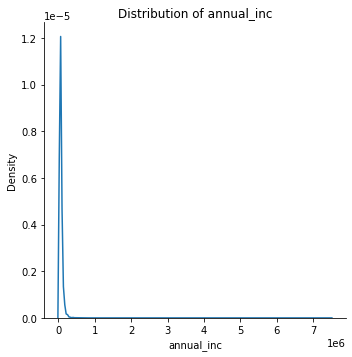

In [59]:
# Plot the distribution of annual_inc
sns.displot(df_loan, x="annual_inc", kind="kde")
plt.title("Distribution of annual_inc")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

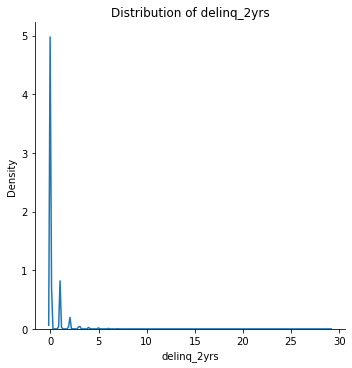

In [60]:
# Plot the distribution of delinq_2yrs
sns.displot(df_loan, x="delinq_2yrs", kind="kde")
plt.title("Distribution of delinq_2yrs")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

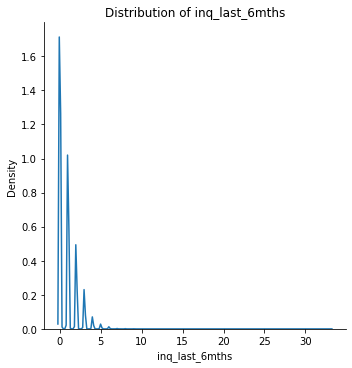

In [61]:
# Plot the distribution of inq_last_6mths
sns.displot(df_loan, x="inq_last_6mths", kind="kde")
plt.title("Distribution of inq_last_6mths")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

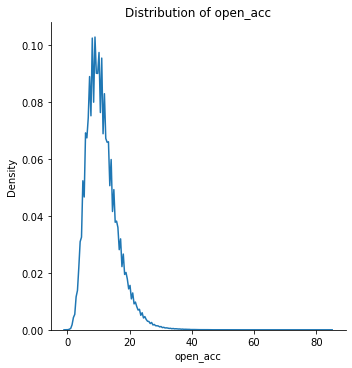

In [62]:
# Plot the distribution of open_acc
sns.displot(df_loan, x="open_acc", kind="kde")
plt.title("Distribution of open_acc")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

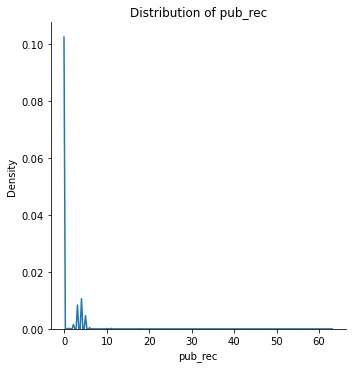

In [63]:
# Plot the distribution of pub_rec
sns.displot(df_loan, x="pub_rec", kind="kde")
plt.title("Distribution of pub_rec")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

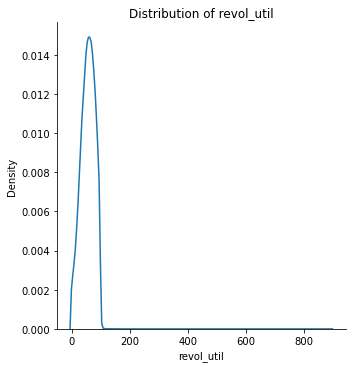

In [64]:
# Plot the distribution of revol_util
sns.displot(df_loan, x="revol_util", kind="kde")
plt.title("Distribution of revol_util")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

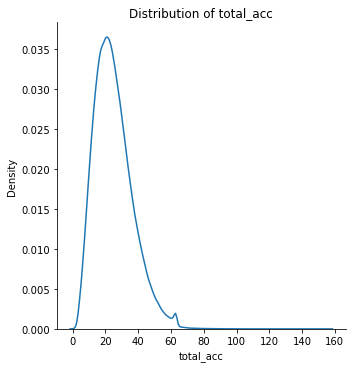

In [65]:
# Plot the distribution of total_acc
sns.displot(df_loan, x="total_acc", kind="kde")
plt.title("Distribution of total_acc")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

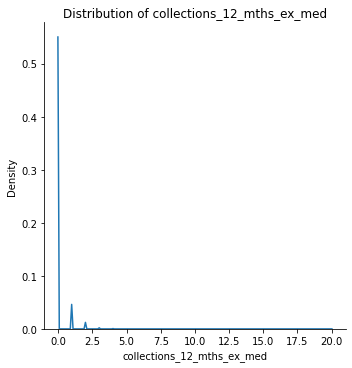

In [66]:
# Plot the distribution of collections_12_mths_ex_med
sns.displot(df_loan, x="collections_12_mths_ex_med", kind="kde")
plt.title("Distribution of collections_12_mths_ex_med")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

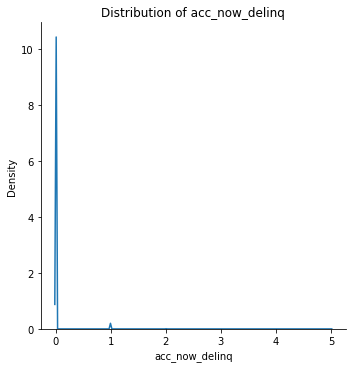

In [67]:
# Plot the distribution of acc_now_delinq
sns.displot(df_loan, x="acc_now_delinq", kind="kde")
plt.title("Distribution of acc_now_delinq")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

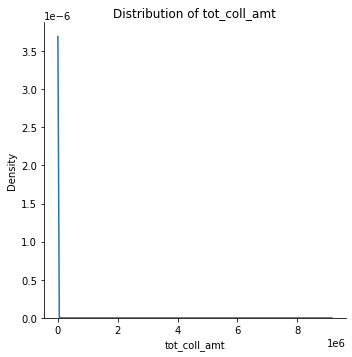

In [68]:
# Plot the distribution of tot_coll_amt
sns.displot(df_loan, x="tot_coll_amt", kind="kde")
plt.title("Distribution of tot_coll_amt")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

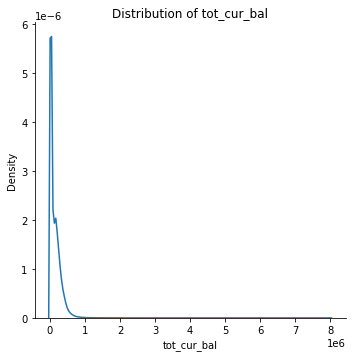

In [69]:
# Plot the distribution of tot_cur_bal
sns.displot(df_loan, x="tot_cur_bal", kind="kde")
plt.title("Distribution of tot_cur_bal")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

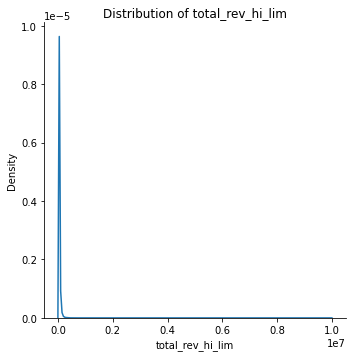

In [70]:
# Plot the distribution of total_rev_hi_lim
sns.displot(df_loan, x="total_rev_hi_lim", kind="kde")
plt.title("Distribution of total_rev_hi_lim")
plt.show()

Since all of the distributions from each columns is skewed, so we can handle the null values by fill the null values by the median of the data.

In [71]:
# Fill null values with median of those columns
df_loan["annual_inc"].fillna(df_loan["annual_inc"].median(), inplace=True)
df_loan["delinq_2yrs"].fillna(df_loan["delinq_2yrs"].median(), inplace=True)
df_loan["inq_last_6mths"].fillna(df_loan["inq_last_6mths"].median(), inplace=True)
df_loan["open_acc"].fillna(df_loan["open_acc"].median(), inplace=True)
df_loan["pub_rec"].fillna(df_loan["pub_rec"].median(), inplace=True)
df_loan["revol_util"].fillna(df_loan["revol_util"].median(), inplace=True)
df_loan["total_acc"].fillna(df_loan["total_acc"].median(), inplace=True)
df_loan["collections_12_mths_ex_med"].fillna(df_loan["collections_12_mths_ex_med"].median(), inplace=True)
df_loan["acc_now_delinq"].fillna(df_loan["acc_now_delinq"].median(), inplace=True)
df_loan["tot_coll_amt"].fillna(df_loan["tot_coll_amt"].median(), inplace=True)
df_loan["tot_cur_bal"].fillna(df_loan["tot_cur_bal"].median(), inplace=True)
df_loan["total_rev_hi_lim"].fillna(df_loan["total_rev_hi_lim"].median(), inplace=True)

# Check if we already handle it
df_loan.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
last_credit_pull_d            0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
dtype: int64

Now, every null values already handled. We can move on to next step.

### Assign Target Column

We need to assign new column as our target column. First thing first we need to check the unique value of Loan_status column to makle new target column.

In [72]:
# Check the unique values in loan status column
df_loan["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

Since we only want to know whether it will be a good loan or a bad loan, so we can filter data with values only "Fully Paid" or "Charge Off". Its because those values show the difference while another values are from the future and also not described well. Then we will map the value of loan_status into "Good Loan" and "Bad Loan".

In [73]:
# Filter data with the value of loan_status is equal to "Fully Paid" or "Charged Off"
df_loan = df_loan[(df_loan["loan_status"] == "Fully Paid") | (df_loan["loan_status"] == "Charged Off")]

# Create a dictionary for mapping the loan_status value
loan_status_dict = {"Fully Paid":"Good Loan", "Charged Off":"Bad Loan"}

# Mapping loan_status column values
df_loan["loan_status"] = df_loan["loan_status"].map(loan_status_dict).astype(str)

df_loan.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,...,13648,83.7,9.0,f,Jan-16,0.0,0.0,0.0,81539.0,22800.0
1,2500,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,...,1687,9.4,4.0,f,Sep-13,0.0,0.0,0.0,81539.0,22800.0
2,2400,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,...,2956,98.5,10.0,f,Jan-16,0.0,0.0,0.0,81539.0,22800.0
3,10000,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,...,5598,21.0,37.0,f,Jan-15,0.0,0.0,0.0,81539.0,22800.0
5,5000,36 months,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,...,7963,28.3,12.0,f,Sep-15,0.0,0.0,0.0,81539.0,22800.0


Next, we create new column bad_loan and mapping into "Good Loan":0 and "Bad Loan":1. Then we drop loan_status column.

In [74]:
# Create a dictionary for mapping the bad_loan value
bad_loan_dict = {"Good Loan": 0, "Bad Loan": 1}

# Create new column bad_loan
df_loan["bad_loan"] = df_loan["loan_status"].copy()

# Mapping bad_loan column values
df_loan["bad_loan"] = df_loan["bad_loan"].map(bad_loan_dict).astype(int)

# Drop loan_status column
df_loan = df_loan.drop(["loan_status"], axis=1)

df_loan.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bad_loan
0,5000,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,...,83.7,9.0,f,Jan-16,0.0,0.0,0.0,81539.0,22800.0,0
1,2500,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,...,9.4,4.0,f,Sep-13,0.0,0.0,0.0,81539.0,22800.0,1
2,2400,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,...,98.5,10.0,f,Jan-16,0.0,0.0,0.0,81539.0,22800.0,0
3,10000,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,...,21.0,37.0,f,Jan-15,0.0,0.0,0.0,81539.0,22800.0,0
5,5000,36 months,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,...,28.3,12.0,f,Sep-15,0.0,0.0,0.0,81539.0,22800.0,0


### Check Correlation

Next, we will see the correlation of other columns with our new target column, bad_loan.

In [75]:
# Create correlation matrix
df_loan.corr().style.background_gradient(cmap="viridis")

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bad_loan
loan_amnt,1.000000,0.210579,0.955769,0.349908,0.056724,0.010929,0.014078,0.202531,-0.073209,0.335381,0.102427,0.236016,-0.000564,0.012742,-0.001198,0.292513,0.313387,0.063201
int_rate,0.210579,1.000000,0.201646,-0.019344,0.170152,0.103120,0.214443,0.044037,0.088680,0.026577,0.360726,-0.007454,0.030489,0.032777,0.001699,-0.051490,-0.125020,0.243949
installment,0.955769,0.201646,1.000000,0.346373,0.059308,0.023437,0.027280,0.200285,-0.063194,0.327308,0.133280,0.218506,0.001535,0.015691,-0.000731,0.269467,0.293430,0.046280
annual_inc,0.349908,-0.019344,0.346373,1.000000,-0.177494,0.056364,0.063684,0.150209,-0.019383,0.319621,0.024005,0.222088,0.005566,0.017848,0.002249,0.398001,0.278190,-0.063172
dti,0.056724,0.170152,0.059308,-0.177494,1.000000,0.000164,0.007006,0.311132,-0.034724,0.158601,0.227354,0.234084,0.003868,0.010302,-0.002613,0.018315,0.072853,0.115997
delinq_2yrs,0.010929,0.103120,0.023437,0.056364,0.000164,1.000000,0.026547,0.059654,-0.005788,-0.029494,-0.013216,0.129676,0.041065,0.109522,-0.000165,0.076910,-0.024801,0.018993
inq_last_6mths,0.014078,0.214443,0.027280,0.063684,0.007006,0.026547,1.000000,0.112459,0.044404,-0.008260,-0.090831,0.141461,0.002137,-0.002251,0.000992,0.063280,0.022755,0.056276
open_acc,0.202531,0.044037,0.200285,0.150209,0.311132,0.059654,0.112459,1.000000,-0.014310,0.235061,-0.104634,0.670294,0.018024,0.019688,-0.000309,0.229551,0.322136,0.016649
pub_rec,-0.073209,0.088680,-0.063194,-0.019383,-0.034724,-0.005788,0.044404,-0.014310,1.000000,-0.101671,-0.053851,0.026269,0.022897,0.004911,0.002070,-0.045719,-0.104299,0.007109
revol_bal,0.335381,0.026577,0.327308,0.319621,0.158601,-0.029494,-0.008260,0.235061,-0.101671,1.000000,0.232261,0.215891,-0.009670,0.006975,-0.002634,0.385798,0.746483,-0.004529


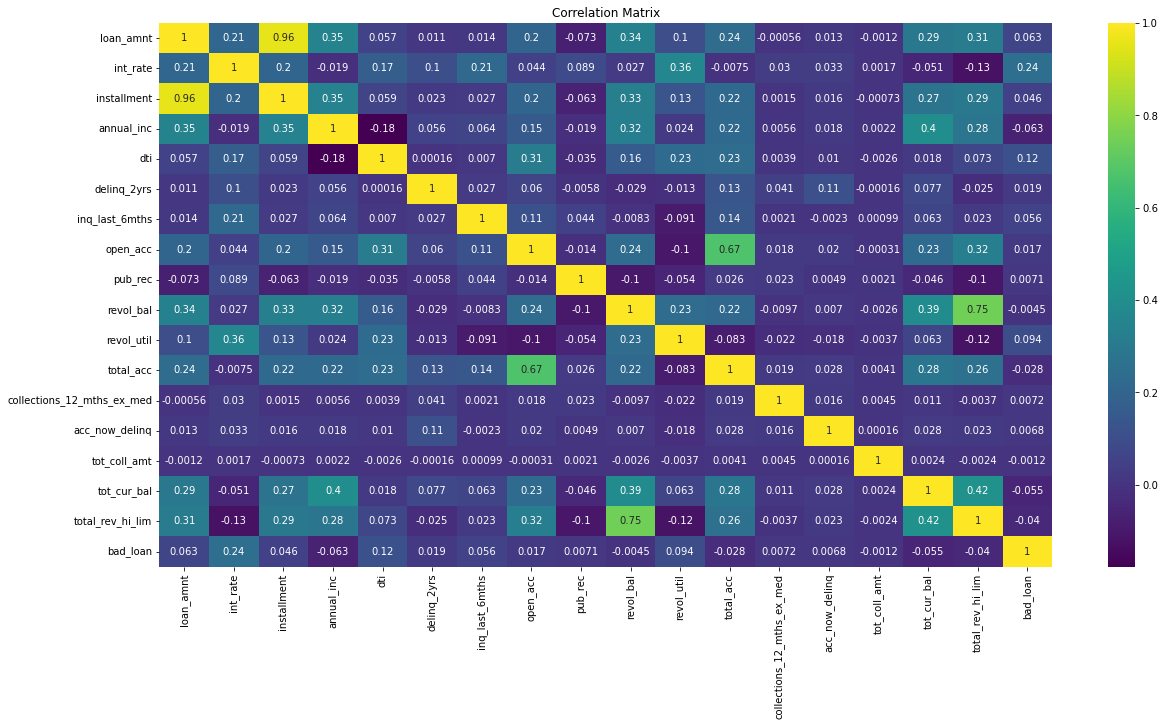

In [76]:
# Create correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(df_loan.corr(), annot=True, cmap="viridis")
plt.title("Correlation Matrix")
plt.show()

From the correlation matrix above, we can see the highest correlation with our target column is int_rate. It shows that the bigger value of the interest rate of the loan, the biggest chances that show it is a bad loan.

### Transform Data into Numerical

Next, we will transform several column with non-numerical data into numerical. First we can check every column data type first.

In [77]:
# Check data type every column
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227214 entries, 0 to 466283
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   227214 non-null  int64  
 1   term                        227214 non-null  object 
 2   int_rate                    227214 non-null  float64
 3   installment                 227214 non-null  float64
 4   grade                       227214 non-null  object 
 5   emp_length                  227214 non-null  object 
 6   home_ownership              227214 non-null  object 
 7   annual_inc                  227214 non-null  float64
 8   verification_status         227214 non-null  object 
 9   issue_d                     227214 non-null  object 
 10  pymnt_plan                  227214 non-null  object 
 11  purpose                     227214 non-null  object 
 12  dti                         227214 non-null  float64
 13  delinq_2yrs   

There are 11 column that we need to transform into numerical.

In [78]:
# See the unique values
print(df_loan["term"].unique())
print(df_loan["grade"].unique())
print(df_loan["emp_length"].unique())
print(df_loan["home_ownership"].unique())
print(df_loan["verification_status"].unique())
print(df_loan["issue_d"].unique())
print(df_loan["pymnt_plan"].unique())
print(df_loan["purpose"].unique())
print(df_loan["earliest_cr_line"].unique())
print(df_loan["initial_list_status"].unique())
print(df_loan["last_credit_pull_d"].unique())

[' 36 months' ' 60 months']
['B' 'C' 'A' 'E' 'F' 'D' 'G']
['10+ years' '< 1 year' '3 years' '9 years' '4 years' '5 years' '1 year'
 '6 years' '2 years' '7 years' '8 years']
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
['Verified' 'Source Verified' 'Not Verified']
['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09'
 'Apr-09' 'Mar-09' 'Feb-09' 'Jan-09' 'Dec-08' 'Nov-08' 'Oct-08' 'Sep-08'
 'Aug-08' 'Jul-08' 'Jun-08' 'May-08' 'Apr-08' 'Mar-08' 'Feb-08' 'Jan-08'
 'Dec-07' 'Nov-07' 'Oct-07' 'Sep-07' 'Aug-07' 'Jul-07' 'Jun-07' 'Dec-13'
 'Nov-13' 'Oct-13' 'Sep-13' 'Aug-13' 'Jul-13' 'Jun-13' 'May-13' 'Apr-13'
 'Mar-13' 'Feb-13' 'Jan-13' 'Dec-12' 'Nov-12' 'Oct-12' 'Sep-12' 'Aug-12'
 'Jul-12' 'Jun-12' 'May-12' 'Apr-12' 'Mar-12' 'Feb-12' 'Jan-12' 'Dec-14'
 'No

In [79]:
# Transform term column
df_loan["term"] = df_loan["term"].str.replace(" 36 months", "36")
df_loan["term"] = df_loan["term"].str.replace(" 60 months", "60")
df_loan["term"] = df_loan["term"].astype(int)

# Transform grade column
# Creating instance of labelencoder
le_grade = LabelEncoder()
df_loan["grade"] = le_grade.fit_transform(df_loan["grade"])

# Transform emp_length column
df_loan["emp_length"] = df_loan["emp_length"].str.replace("< 1 year", str(0))
df_loan["emp_length"] = df_loan["emp_length"].str.replace("\+ years", "")
df_loan["emp_length"] = df_loan["emp_length"].str.replace(" years", "")
df_loan["emp_length"] = df_loan["emp_length"].str.replace(" year", "")
df_loan["emp_length"] = df_loan["emp_length"].astype(int)

# Transform home_ownership column
# Creating instance of labelencoder
le_home_ownership = LabelEncoder()
df_loan["home_ownership"] = le_home_ownership.fit_transform(df_loan["home_ownership"])

# Transform verification_status column
# Creating instance of labelencoder
le_verification_status = LabelEncoder()
df_loan["verification_status"] = le_verification_status.fit_transform(df_loan["verification_status"])

# Transform issue_d column
df_loan["issue_d"] = df_loan["issue_d"].str.replace("Jan-", "")
df_loan["issue_d"] = df_loan["issue_d"].str.replace("Feb-", "")
df_loan["issue_d"] = df_loan["issue_d"].str.replace("Mar-", "")
df_loan["issue_d"] = df_loan["issue_d"].str.replace("Apr-", "")
df_loan["issue_d"] = df_loan["issue_d"].str.replace("May-", "")
df_loan["issue_d"] = df_loan["issue_d"].str.replace("Jun-", "")
df_loan["issue_d"] = df_loan["issue_d"].str.replace("Jul-", "")
df_loan["issue_d"] = df_loan["issue_d"].str.replace("Aug-", "")
df_loan["issue_d"] = df_loan["issue_d"].str.replace("Sep-", "")
df_loan["issue_d"] = df_loan["issue_d"].str.replace("Oct-", "")
df_loan["issue_d"] = df_loan["issue_d"].str.replace("Nov-", "")
df_loan["issue_d"] = df_loan["issue_d"].str.replace("Dec-", "")
df_loan["issue_d"] = df_loan["issue_d"].astype(int)

# Transform pymnt_plan column
# Creating instance of labelencoder
le_pymnt_plan = LabelEncoder()
df_loan["pymnt_plan"] = le_pymnt_plan.fit_transform(df_loan["pymnt_plan"])

# Transform purpose column
# Creating instance of labelencoder
le_purpose = LabelEncoder()
df_loan["purpose"] = le_purpose.fit_transform(df_loan["purpose"])

# Transform earliest_cr_line column
df_loan["earliest_cr_line"] = df_loan["earliest_cr_line"].str.replace("Jan-", "")
df_loan["earliest_cr_line"] = df_loan["earliest_cr_line"].str.replace("Feb-", "")
df_loan["earliest_cr_line"] = df_loan["earliest_cr_line"].str.replace("Mar-", "")
df_loan["earliest_cr_line"] = df_loan["earliest_cr_line"].str.replace("Apr-", "")
df_loan["earliest_cr_line"] = df_loan["earliest_cr_line"].str.replace("May-", "")
df_loan["earliest_cr_line"] = df_loan["earliest_cr_line"].str.replace("Jun-", "")
df_loan["earliest_cr_line"] = df_loan["earliest_cr_line"].str.replace("Jul-", "")
df_loan["earliest_cr_line"] = df_loan["earliest_cr_line"].str.replace("Aug-", "")
df_loan["earliest_cr_line"] = df_loan["earliest_cr_line"].str.replace("Sep-", "")
df_loan["earliest_cr_line"] = df_loan["earliest_cr_line"].str.replace("Oct-", "")
df_loan["earliest_cr_line"] = df_loan["earliest_cr_line"].str.replace("Nov-", "")
df_loan["earliest_cr_line"] = df_loan["earliest_cr_line"].str.replace("Dec-", "")
df_loan["earliest_cr_line"] = df_loan["earliest_cr_line"].astype(int)

# Transform initial_list_status column
# Creating instance of labelencoder
le_initial_list_status = LabelEncoder()
df_loan["initial_list_status"] = le_initial_list_status.fit_transform(df_loan["initial_list_status"])

# Transform last_credit_pull_d column
df_loan["last_credit_pull_d"] = df_loan["last_credit_pull_d"].str.replace("Jan-", "")
df_loan["last_credit_pull_d"] = df_loan["last_credit_pull_d"].str.replace("Feb-", "")
df_loan["last_credit_pull_d"] = df_loan["last_credit_pull_d"].str.replace("Mar-", "")
df_loan["last_credit_pull_d"] = df_loan["last_credit_pull_d"].str.replace("Apr-", "")
df_loan["last_credit_pull_d"] = df_loan["last_credit_pull_d"].str.replace("May-", "")
df_loan["last_credit_pull_d"] = df_loan["last_credit_pull_d"].str.replace("Jun-", "")
df_loan["last_credit_pull_d"] = df_loan["last_credit_pull_d"].str.replace("Jul-", "")
df_loan["last_credit_pull_d"] = df_loan["last_credit_pull_d"].str.replace("Aug-", "")
df_loan["last_credit_pull_d"] = df_loan["last_credit_pull_d"].str.replace("Sep-", "")
df_loan["last_credit_pull_d"] = df_loan["last_credit_pull_d"].str.replace("Oct-", "")
df_loan["last_credit_pull_d"] = df_loan["last_credit_pull_d"].str.replace("Nov-", "")
df_loan["last_credit_pull_d"] = df_loan["last_credit_pull_d"].str.replace("Dec-", "")
df_loan["last_credit_pull_d"] = df_loan["last_credit_pull_d"].astype(int)

# Check our data
df_loan.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bad_loan
0,5000,36,10.65,162.87,1,10,5,24000.0,2,11,...,83.7,9.0,0,16,0.0,0.0,0.0,81539.0,22800.0,0
1,2500,60,15.27,59.83,2,0,5,30000.0,1,11,...,9.4,4.0,0,13,0.0,0.0,0.0,81539.0,22800.0,1
2,2400,36,15.96,84.33,2,10,5,12252.0,0,11,...,98.5,10.0,0,16,0.0,0.0,0.0,81539.0,22800.0,0
3,10000,36,13.49,339.31,2,10,5,49200.0,1,11,...,21.0,37.0,0,15,0.0,0.0,0.0,81539.0,22800.0,0
5,5000,36,7.90,156.46,0,3,5,36000.0,1,11,...,28.3,12.0,0,15,0.0,0.0,0.0,81539.0,22800.0,0


### Preparing Data into X (Features) and Y (Target)

We will create X and y where X is our features and y as our target column. In this problem, our target is bad_loan column.

In [101]:
# Prepare X and y
X = df_loan.drop(["bad_loan"], axis=1)
y = df_loan["bad_loan"]

# See the shape of it
X.shape, y.shape

((227214, 28), (227214,))

In [102]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("Data split done")

Data split done


In [103]:
X_train.shape, X_test.shape

((181771, 28), (45443, 28))

## Create Machine Learning Model

### Select The Best Model

Next, we wil try to compare some algorithms to choose the best one.

Extra Trees: 0.792566 (0.001488)
Random Forest: 0.806289 (0.000526)
XGBoost: 0.815295 (0.000688)
Decision Tree: 0.707632 (0.001946)
Logistic Regression: 0.669070 (0.001176)


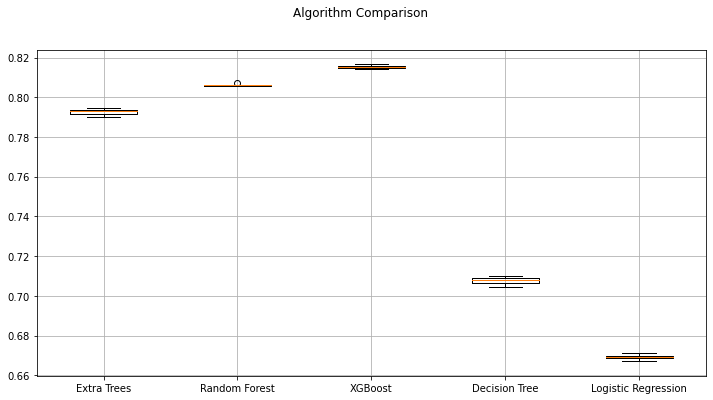

In [83]:
# List of models
models = []
models.append(("Extra Trees", ExtraTreesClassifier()))
models.append(("Random Forest", RandomForestClassifier()))
models.append(("XGBoost", XGBClassifier()))
models.append(("Decision Tree", DecisionTreeClassifier()))
models.append(("Logistic Regression", LogisticRegression()))

results = []
names = []
scoring = "accuracy"
for name, model in models:
    pipeline = imbpipeline(steps = [["smote", SMOTE(random_state=11)], ["scaler", MinMaxScaler()], ["classifier", model]])
    kfold = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=42)
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Show the comparisons through visualization
fig = plt.figure(figsize=(12, 6))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.show()

From the comparison above, we can see that XGBoost algorithm has the best accuracy among the others. So, we will use XGBoost as our model.

### PCA (Pricipal Component Analysis)

Besides using XGBoost as our model, to improve the performance of our model we also use PCA to do dimensionality reduction. First thing we do is choosing the right total components create by PCA. We want the explained variance ratio from the principal components of PCA is 95%.

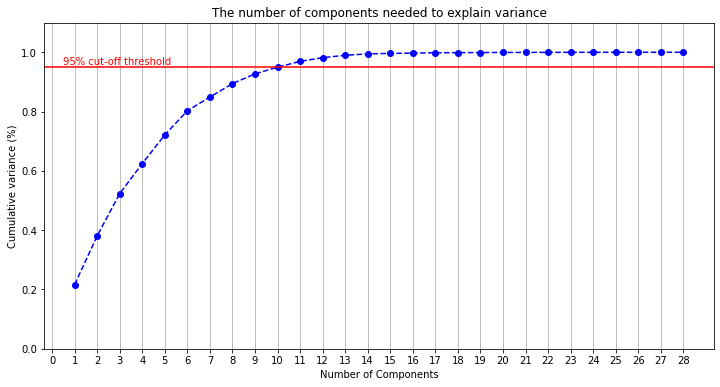

In [98]:
# PCA initialization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA().fit(X_scaled)

# Create plot for explained variance ratio
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, 29, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker="o", linestyle="--", color="b")

plt.xlabel("Number of Components")
plt.xticks(np.arange(0, 29, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel("Cumulative variance (%)")
plt.title("The number of components needed to explain variance")

plt.axhline(y=0.95, color="r", linestyle="-")
plt.text(0.5, 0.96, "95% cut-off threshold", color = "red")

ax.grid(axis="x")
plt.show()

From the graph above, we can see that we should use 10 for our number of components from our PCA. By using 10 components, we got 95% for the explained variance ratio .

### Create Pipeline

Next, we will create our model pipeline. In this pipeline, we will use SMOTE to handling imbalanced in our data, normalization to make our data more normalize, PCA to do dimensionality reduction, and XGBoost classifier as our classifier.

In [106]:
# Create model pipeline
model = imbpipeline(steps = [["smote", SMOTE(random_state=11)], ["scaler", MinMaxScaler()], \
                                ["pca", PCA(n_components=10)], ["classifier", XGBClassifier()]])

# Cross validation
kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=42)
cv_results = cross_val_score(pipeline, X, y, cv=kfold, scoring="accuracy")

# Cross validation score
print("Score : {}".format(round(cv_results.mean(),2)))

Score : 0.82


### Save Model

In [109]:
# Save model
filename = "finalized_model.sav"
dump(model, open(filename, "wb"))